<a href="https://colab.research.google.com/github/bbbb4556/cicmal2022-Ransanware/blob/main/Copy_of_Copy_of_Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split # Import train_test_split function
import warnings
import seaborn as sns
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Flatten
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**مشاهده داده ها**


In [ ]:
data0=pd.read_excel('/content/drive/MyDrive/malmem2022-full.xlsx')
data0

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Trojan-Zeus,40,16,9.825000,0,208.075000,1556,38.900000,8323,208.075000,...,221,26,24,116,0,121,87,0,8,Malware
58592,Trojan-Zeus,39,15,9.974359,0,210.358974,1521,39.000000,8204,210.358974,...,221,26,24,116,0,120,87,0,8,Malware
58593,Trojan-Zeus,37,15,10.054054,0,214.702703,1445,39.054054,7944,214.702703,...,221,26,24,116,0,118,87,0,8,Malware
58594,Trojan-Zeus,37,15,10.108108,0,214.675676,1445,39.054054,7943,214.675676,...,221,26,24,116,0,118,87,0,8,Malware


** **توصیفی از داده ها**

In [ ]:
data0.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


## **مشاهده تعداد داده ها-تعداد داده های مخرب و غیرمخرب(خوش خیم)-مجموع داده های مخرب برابر با داده های غیرمخرب می باشد**

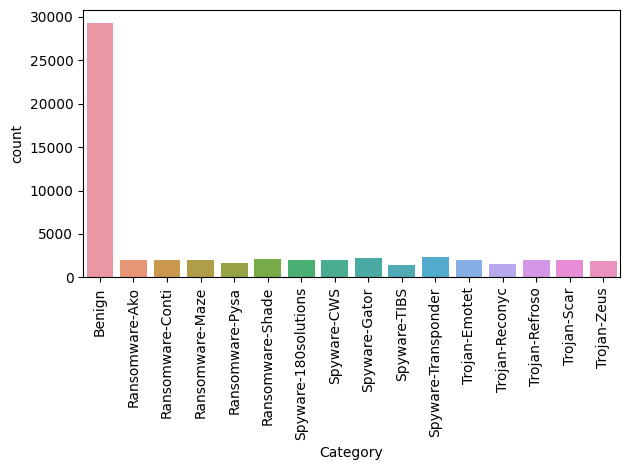

In [ ]:
sns.countplot(x=data0["Category"])
#sns.countplot(x=data0["Category"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**شروع اقدامات پیش پردازش داده ها**

In [ ]:
to_drop=['Class']

** حذف می گرددclass برابر با استراتژی و روش کار پیش بینی شده ابتدا ستون **

In [ ]:
data0.drop(to_drop,inplace=True,axis=1)

**برابر مقاله دیتاست موجود با توجه به اینکه ما قصد داریم فقط روی بدافزار مبهم کار کنیم برخی از ویژگی های دیتاست که مخصوص برای بدافزار مبهم می باشد را نگه می داریم و باقی را حذف می کنیم**

In [ ]:
to_drop=['pslist.nproc','pslist.nppid','pslist.avg_threads','pslist.nprocs64bit',
         'pslist.avg_handlers','dlllist.ndlls','dlllist.avg_dlls_per_proc',
         'handles.nhandles','handles.avg_handles_per_proc','ldrmodules.not_in_load',
         'ldrmodules.not_in_init','ldrmodules.not_in_mem','malfind.ninjections',
         'psxview.not_in_pslist','psxview.not_in_eprocess_pool','psxview.not_in_ethread_pool',
         'psxview.not_in_pspcid_list','psxview.not_in_csrss_handles','psxview.not_in_session',
         'psxview.not_in_deskthrd','psxview.not_in_csrss_handles_false_avg','modules.nmodules',
         'svcscan.nservices','svcscan.kernel_drivers','svcscan.fs_drivers','svcscan.process_services',
         'svcscan.shared_process_services','svcscan.interactive_process_services','svcscan.nactive',
         'callbacks.ncallbacks','callbacks.nanonymous','callbacks.ngeneric']

In [ ]:
data0.drop(to_drop, inplace=True, axis=1)

** کار کنیم باقی بدافزار موجود در دیتاست را حدف می کنیمRansanwareبا توجه به اینکه ما قصد داریم فقط بر روی بدافزار **

In [ ]:
data0.drop(data0[data0['Category']=='Trojan-Reconyc'].index,inplace=True)
data0.drop(data0[data0['Category']=='Trojan-Zeus'].index,inplace=True)
data0.drop(data0[data0['Category']=='Trojan-Scar'].index,inplace=True)
data0.drop(data0[data0['Category']=='Trojan-Refroso'].index,inplace=True)
data0.drop(data0[data0['Category']=='Trojan-Emotet'].index,inplace=True)
data0.drop(data0[data0['Category']=='Spyware-Transponder'].index,inplace=True)
data0.drop(data0[data0['Category']=='Spyware-TIBS'].index,inplace=True)
data0.drop(data0[data0['Category']=='Spyware-Gator'].index,inplace=True)
data0.drop(data0[data0['Category']=='Spyware-CWS'].index,inplace=True)
data0.drop(data0[data0['Category']=='Spyware-180solutions'].index,inplace=True)

In [ ]:
data0

,Category,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,...,ldrmodules.not_in_mem_avg,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg
0,Benign,0,670,3161,46,716,887,104,671,125,...,0.030372,21,30,1.250000,0.042553,0.0,0.063830,0.042553,0.085106,0.191489
1,Benign,0,840,3761,51,1011,1030,117,766,148,...,0.036167,77,72,1.714286,0.000000,0.0,0.000000,0.000000,0.042553,0.127660
2,Benign,0,1050,3996,45,784,1241,100,645,138,...,0.026114,6,30,1.250000,0.000000,0.0,0.000000,0.000000,0.050000,0.125000
3,Benign,0,630,2961,36,654,792,83,567,127,...,0.021483,2,12,1.000000,0.000000,0.0,0.000000,0.000000,0.062500,0.187500
4,Benign,0,908,3834,45,1252,942,103,825,135,...,0.047820,77,72,2.000000,0.086957,0.0,0.086957,0.086957,0.130435,0.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39084,Ransomware-Shade,0,665,2980,46,696,713,107,616,123,...,0.029306,4,24,1.000000,0.022727,0.0,0.022727,0.022727,0.068182,0.159091
39085,Ransomware-Shade,0,662,2944,45,691,706,106,608,119,...,0.029448,4,24,1.000000,0.045455,0.0,0.045455,0.045455,0.090909,0.181818
39086,Ransomware-Shade,0,653,2895,44,709,677,100,606,116,...,0.030457,4,24,1.000000,0.046512,0.0,0.046512,0.046512,0.093023,0.186047
39087,Ransomware-Shade,0,652,2870,43,699,672,98,604,113,...,0.030539,4,24,1.000000,0.069767,0.0,0.069767,0.069767,0.116279,0.209302


** در دیتاست موجود می باشدRansanware با توجه به حذف دیگر بدافزارها فقط انواع بدافزار **

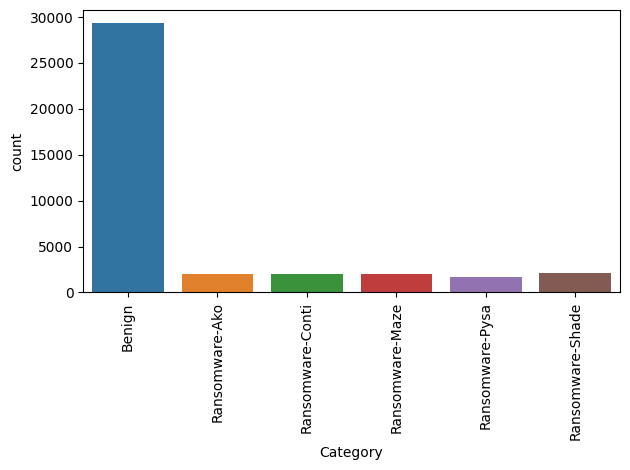

In [ ]:
sns.countplot(x=data0["Category"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**با این قطعه کد ویژگی یا ستون اول دیتاست را که با پیش پردازشی که انجام دادیم شامل داده های خوش خیم و بدافزار از نوع رنسانویر میباشد را به انتهای دیتاست منتقل می کنیم تا به عنوان ستون لیبل ما برای اعمال الگوریتم های یادگیری ماشین باشد**

In [ ]:
temp_cols=data0.columns.to_list()
new_cols=temp_cols[1:] + temp_cols[0:1]
data0=data0[new_cols]
data0

,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,...,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,Category
0,0,670,3161,46,716,887,104,671,125,184,...,21,30,1.250000,0.042553,0.0,0.063830,0.042553,0.085106,0.191489,Benign
1,0,840,3761,51,1011,1030,117,766,148,337,...,77,72,1.714286,0.000000,0.0,0.000000,0.000000,0.042553,0.127660,Benign
2,0,1050,3996,45,784,1241,100,645,138,369,...,6,30,1.250000,0.000000,0.0,0.000000,0.000000,0.050000,0.125000,Benign
3,0,630,2961,36,654,792,83,567,127,186,...,2,12,1.000000,0.000000,0.0,0.000000,0.000000,0.062500,0.187500,Benign
4,0,908,3834,45,1252,942,103,825,135,375,...,77,72,2.000000,0.086957,0.0,0.086957,0.086957,0.130435,0.217391,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39084,0,665,2980,46,696,713,107,616,123,179,...,4,24,1.000000,0.022727,0.0,0.022727,0.022727,0.068182,0.159091,Ransomware-Shade
39085,0,662,2944,45,691,706,106,608,119,177,...,4,24,1.000000,0.045455,0.0,0.045455,0.045455,0.090909,0.181818,Ransomware-Shade
39086,0,653,2895,44,709,677,100,606,116,164,...,4,24,1.000000,0.046512,0.0,0.046512,0.046512,0.093023,0.186047,Ransomware-Shade
39087,0,652,2870,43,699,672,98,604,113,163,...,4,24,1.000000,0.069767,0.0,0.069767,0.069767,0.116279,0.209302,Ransomware-Shade


**با انجام عمل مپ داده های غیر عددی خود را تبدیل به عدد می کنیم و ستون جدید تارگت را ایجاد می کنیم-هدف از ایجاد این کار بدست آوردن کورولیشن بین داده ها و راحتی کار با الگوریتم های یادگیری ماشین می باشد**

In [ ]:
data0['target']=data0['Category'].map({'Benign':0,'Ransomware-Ako':1,'Ransomware-Conti':1,'Ransomware-Maze':1,'Ransomware-Pysa':1,'Ransomware-Shade':1})

In [ ]:
data0

,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,...,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,Category,target
0,0,670,3161,46,716,887,104,671,125,184,...,30,1.250000,0.042553,0.0,0.063830,0.042553,0.085106,0.191489,Benign,0
1,0,840,3761,51,1011,1030,117,766,148,337,...,72,1.714286,0.000000,0.0,0.000000,0.000000,0.042553,0.127660,Benign,0
2,0,1050,3996,45,784,1241,100,645,138,369,...,30,1.250000,0.000000,0.0,0.000000,0.000000,0.050000,0.125000,Benign,0
3,0,630,2961,36,654,792,83,567,127,186,...,12,1.000000,0.000000,0.0,0.000000,0.000000,0.062500,0.187500,Benign,0
4,0,908,3834,45,1252,942,103,825,135,375,...,72,2.000000,0.086957,0.0,0.086957,0.086957,0.130435,0.217391,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39084,0,665,2980,46,696,713,107,616,123,179,...,24,1.000000,0.022727,0.0,0.022727,0.022727,0.068182,0.159091,Ransomware-Shade,1
39085,0,662,2944,45,691,706,106,608,119,177,...,24,1.000000,0.045455,0.0,0.045455,0.045455,0.090909,0.181818,Ransomware-Shade,1
39086,0,653,2895,44,709,677,100,606,116,164,...,24,1.000000,0.046512,0.0,0.046512,0.046512,0.093023,0.186047,Ransomware-Shade,1
39087,0,652,2870,43,699,672,98,604,113,163,...,24,1.000000,0.069767,0.0,0.069767,0.069767,0.116279,0.209302,Ransomware-Shade,1


** *italicized text*تعداد خوش خیم و بدافزار**

In [ ]:
data0['Category'].dtypes

dtype('O')

In [ ]:
data0['target'].dtypes

dtype('int64')

In [ ]:
total=len(data0)
Benign=len(data0[data0['target']==0])
Ransomware=len(data0[data0['target']==1])

In [ ]:
print('total Target=',total)
print('total Benign=',Benign)
print('total Ransanware=',Ransomware)

total Target= 39089
total Benign= 29298
total Ransanware= 9791


** تعداد بر اساس درصد**

In [ ]:
print('%Benign= ', 1.* Benign/total*100)
print('%Ransomware= ', 1.* Ransomware/total*100)

%Benign=  74.9520325411241
%Ransomware=  25.047967458875895


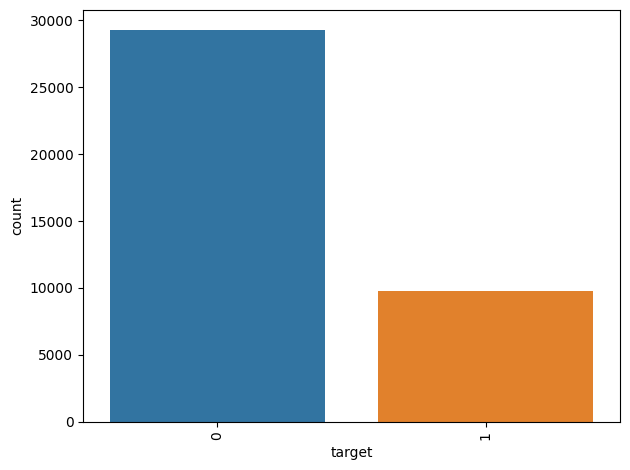

In [ ]:
sns.countplot(x=data0["target"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**بدست آوردن کورولیشن بین داده ها از کم به زیاد**

In [ ]:
data0.corr()['target'].sort_values()

handles.nsection                         -0.869143
handles.nevent                           -0.819901
handles.nthread                          -0.808711
handles.nmutant                          -0.786450
handles.ntimer                           -0.768331
handles.nsemaphore                       -0.727063
handles.nkey                             -0.653503
handles.ndesktop                         -0.335857
ldrmodules.not_in_load_avg               -0.301804
ldrmodules.not_in_mem_avg                -0.301436
handles.ndirectory                       -0.263069
ldrmodules.not_in_init_avg               -0.026889
handles.nfile                            -0.022465
psxview.not_in_eprocess_pool_false_avg   -0.002369
psxview.not_in_pslist_false_avg           0.028825
psxview.not_in_pspcid_list_false_avg      0.031857
psxview.not_in_session_false_avg          0.046585
psxview.not_in_ethread_pool_false_avg     0.054463
psxview.not_in_deskthrd_false_avg         0.134400
malfind.protection             


```

**نمایش همبستگی بین ویژگی ها**

<Axes: >

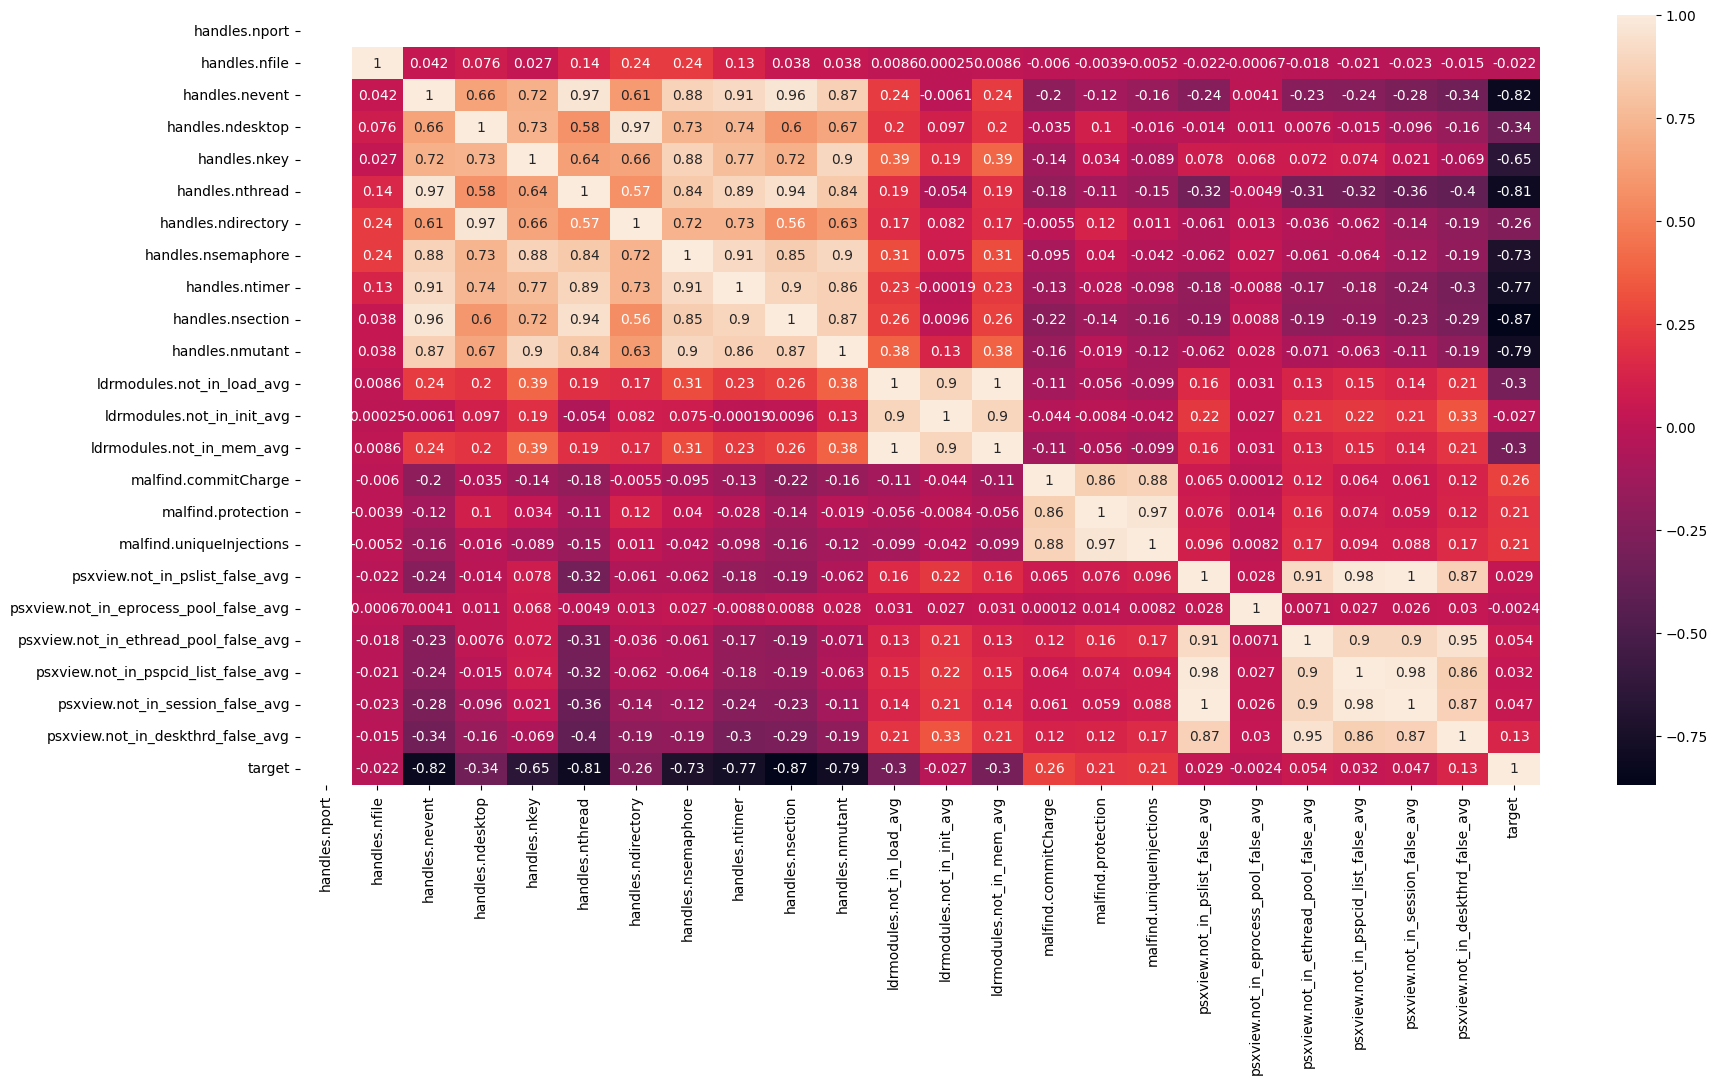

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data0.corr(),annot=True)

***شروع اعمال الگوریتم های یادگیری ماشین***



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data0.drop(['Category','target'],axis=1)
y=data0['target']

In [ ]:
y.value_counts()

0    29298
1     9791
Name: target, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from sklearn.metrics import roc_curve, auc




In [ ]:
#from sklearn.metrics import plot_roc_curve
#from sklearn.metrics import plot_roc_curve
#from sklearn import datasets, metrics, model_selection, svm
#from sklearn.metrics import plot_roc_curve, auc 
#from sklearn.metrics import plot_roc_curve


In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
 
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
 
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
 
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
 
# Part 3 - Training the ANN
 
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
 
# Training the ANN on the Training set
ann.fit(x_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15
856/856 [==============================] - 5s 3ms/step - loss: 7.7592 - accuracy: 0.7263
Epoch 2/15
856/856 [==============================] - 3s 3ms/step - loss: 0.4345 - accuracy: 0.7791
Epoch 3/15
856/856 [==============================] - 3s 3ms/step - loss: 0.4190 - accuracy: 0.7793
Epoch 4/15
856/856 [==============================] - 3s 3ms/step - loss: 0.3998 - accuracy: 0.7793
Epoch 5/15
856/856 [==============================] - 4s 4ms/step - loss: 0.3786 - accuracy: 0.7806
Epoch 6/15
856/856 [==============================] - 3s 3ms/step - loss: 0.3523 - accuracy: 0.7843
Epoch 7/15
856/856 [==============================] - 3s 3ms/step - loss: 0.3172 - accuracy: 0.7908
Epoch 8/15
856/856 [==============================] - 3s 3ms/step - loss: 0.2327 - accuracy: 0.9046
Epoch 9/15
856/856 [==============================] - 3s 3ms/step - loss: 0.1037 - accuracy: 0.9836
Epoch 10/15
856/856 [==============================] - 3s 4ms/step - loss: 0.0404 - accuracy: 0.9924

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


367/367 [==============================] - 1s 1ms/step
[[8783   45]
 [   5 2894]]


0.9957363349535261

<Axes: >

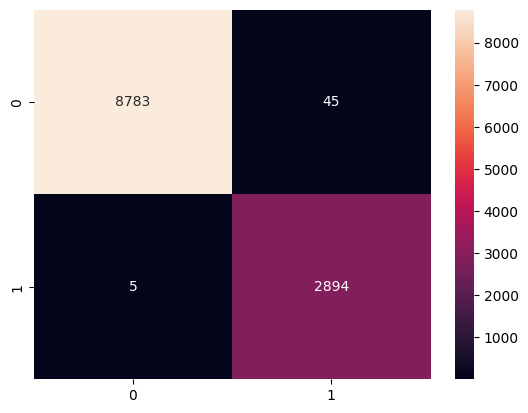

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

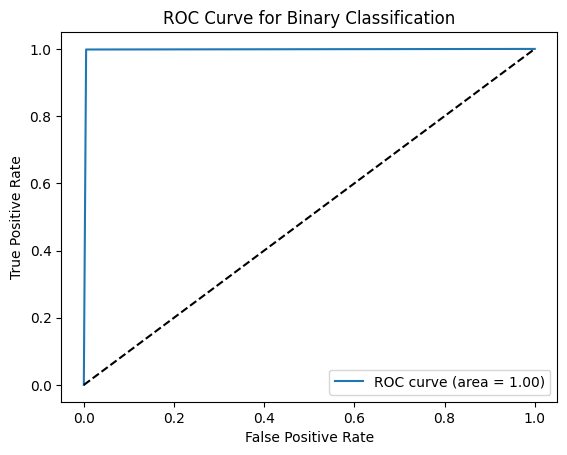

In [ ]:
# Calculate the fpr, tpr, and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score using the auc function
auc_score = auc(fpr, tpr)

# Plot the ROC curve using Matplotlib
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = ann.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

367/367 [==============================] - 1s 1ms/step


In [ ]:
model=Sequential()
model.add(Dense(30,input_dim=23,kernel_initializer="uniform",activation="relu"))
model.add(Dense(8,kernel_initializer="uniform",activation="relu"))
model.add(Dense(1,kernel_initializer="uniform",activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(x_train, y_train, batch_size=8, epochs=2, verbose=1,validation_data=(x_test, y_test))

history=model.fit(x_train,y_train,epochs=2,batch_size=8)



Epoch 1/2
3421/3421 [==============================] - 13s 3ms/step - loss: 0.0632 - accuracy: 0.9750
Epoch 2/2
3421/3421 [==============================] - 18s 5ms/step - loss: 0.0201 - accuracy: 0.9926


In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

367/367 [==============================] - 1s 1ms/step
[[8828    0]
 [2599  300]]


0.7783746908842841

<Axes: >

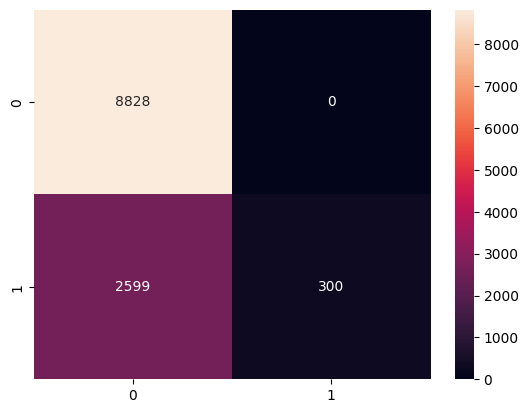

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
knn_disp = RocCurveDisplay.from_estimator(x_test, y_test)


TypeError: ignored

In [ ]:
seq_disp = RocCurveDisplay.from_estimator(model,x_test, y_test)


In [ ]:
y_pred1=model.predict(x_test)
acc_knb_model=roc_auc_score(y_test,y_pred)*100
acc_knb_model

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')


In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
model.summary()




In [ ]:
cm=confusion_matrix(y_test,y_pred)


knn پیاده سازی الگوریتم 

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
clf=knn.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc_knb_model=roc_auc_score(y_test,y_pred)*100
acc_knb_model

In [ ]:
cm=confusion_matrix(y_test,y_pred)


In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
roc_auc_score(knn,x_test,y_test)
#metrics.plot_roc_curve(knn,x_test,y_test)  


**Logistic Regression سازی الگوریتم **

In [ ]:
lr=LogisticRegression(C=0.3)
clfl=lr.fit(x_train,y_train)
y_predl=clfl.predict(x_test)
acc_log_reg=roc_auc_score(y_test,y_predl)*100
acc_log_reg

In [ ]:
cm=confusion_matrix(y_test,y_predl)
sns.heatmap(cm,annot=True,fmt='d')


In [ ]:
print(classification_report(y_test,y_predl))

In [ ]:
plot_roc_curve(lr,x_test,y_test)



```
``
```

**DecisionTreeپیاده سازی الگوریتم **

In [ ]:
clf3=DecisionTreeClassifier().fit(x_train,y_train)
y_pred3=clf3.predict(x_test)
acc_dt=roc_auc_score(y_test,y_predl)*100
acc_dt

In [ ]:
cm=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,y_pred3))

In [ ]:
plot_roc_curve(clf3,x_test,y_test)



```
# This is formatted as code
```

** RandomForestپیاده سازی الگوریتم **

In [ ]:
clf4=RandomForestClassifier(max_depth=9,random_state=0).fit(x_train,y_train)
y_pred4=clf4.predict(x_test)
acc_rmf_model=roc_auc_score(y_test,y_pred4) * 100
acc_rmf_model

In [ ]:
cm=confusion_matrix(y_test,y_pred4)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,y_pred4))

In [ ]:
plot_roc_curve(clf4,x_test,y_test)

** **bold text**SGD پیاده سازی الگوریتم **

In [ ]:
#from re import S
sgd_model=SGDClassifier()
sgd_model.fit(x_train,y_train)
sgd_pred=sgd_model.predict(x_test)
acc_sgd_model=roc_auc_score(y_test,sgd_pred)*100
#acc_sgd=round(sgd_model.score(x_train,y_train)*100.10)
acc_sgd_model

In [ ]:
cm=confusion_matrix(y_test,sgd_pred)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(y_test,y_pred4))

In [ ]:
plot_roc_curve(clf4,x_test,sgd_pred)

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 

In [ ]:
NN = MLPClassifier()

In [ ]:
NN.fit(x_train, y_train)

In [ ]:
acc_sgd_model2=roc_auc_score(y_test,sgd_pred)*100

acc_sgd_model2

In [ ]:
cm=confusion_matrix(y_test,y_pred4)
sns.heatmap(cm,annot=True,fmt='d')